# Plot output from *parcels* trajectory calculation

Trajectories evaluated in parcels_seychelles_run, plot the output here specific to required analysis

In [42]:
import matplotlib.pyplot as plt
import xarray as xr
from datetime import datetime
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [2]:
# Load the file that was output from parcels
ds=xr.open_dataset('seychelles_1000p.nc')
# Set the coordinates of the obs dimension to time (for intuitive indexing)
ds.coords['obs']=ds['time'].sel(traj=0)
# Index the first point in time
dend=ds.sel(obs=datetime(2016,1,30,0),method='nearest')

# Particle final locations

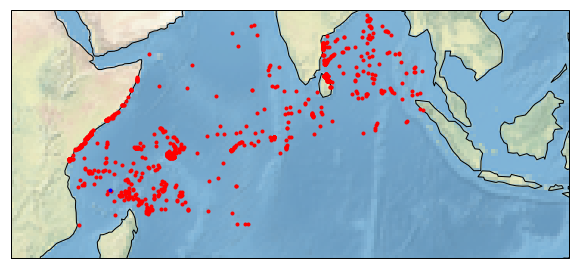

In [3]:
# Plot final points on a map projection
fig,ax = plt.subplots(figsize=(10,10),ncols=1,subplot_kw={'projection': ccrs.PlateCarree()})
ax.coastlines()
ax.stock_img()
ax.set_xlim(30,120)
ax.set_ylim(-20,20)
ax.plot(dend.lon.values,dend.lat.values,'r.')
ax.plot(46,-9,'b.')

# 2D histogram of final locations

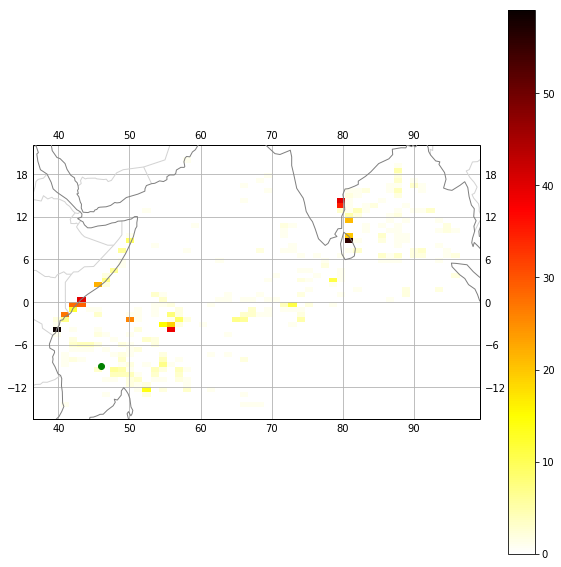

In [105]:
# Calculate 2D histogram of final locations using numpy
h,xe,ye = np.histogram2d(dend.lon.values,dend.lat.values,[50,50]);
# Set up figure
fig,ax = plt.subplots(figsize=(10,10),ncols=1,subplot_kw={'projection': ccrs.PlateCarree()})
ax.add_feature(cfeature.BORDERS,edgecolor='lightgray',zorder=2);
ax.add_feature(cfeature.COASTLINE,edgecolor='gray',zorder=3);
ax.gridlines(draw_labels='true')
# Visualise data
im=ax.pcolormesh(xe,ye,np.transpose(h),zorder=1)
im.set_cmap('hot_r')
plt.colorbar(im,ax=ax);
# Plot original (final) particle location
ax.plot(46,-9,'go');
